In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.fft import fft, ifft
#from scipy.fft import fft, ifft

In [2]:
N = 10  # signal block length
k = np.arange(N)  # all required sample/time indices
A = 10  # signal amplitude


In [3]:
# k = np.arange(N)  # all required sample/time indices, already defined above

# all required DFT frequency indices, actually same entries like in k
mu = np.arange(N)

# set up matrices
K = np.outer(k, mu)  # get all possible entries k*mu in meaningful arrangement
W = np.exp(+1j * 2*np.pi/N * K)  # analysis matrix for DFT

True
DC is 1 as expected:  (0.6+8.881784197001253e-17j)


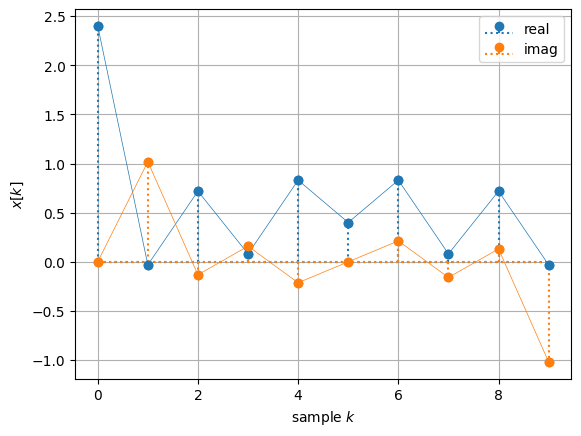

In [4]:
X_test = np.array([6, 2, 4, 3, 4, 5, 0, 0, 0, 0])
# x_test = 1/N*W@X_test  # >= Python3.5
x_test = 1/N * np.matmul(W, X_test)

plt.stem(k, np.real(x_test), label='real',
            markerfmt='C0o', basefmt='C0:', linefmt='C0:')
plt.stem(k, np.imag(x_test), label='imag',
            markerfmt='C1o', basefmt='C1:', linefmt='C1:')    
    # note that connecting the samples by lines is actually wrong, we
    # use it anyway for more visual convenience
plt.plot(k, np.real(x_test), 'C0o-', lw=0.5)
plt.plot(k, np.imag(x_test), 'C1o-', lw=0.5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'$x[k]$')
plt.legend()
plt.grid(True)

# check if results are identical with numpy ifft package
print(np.allclose(ifft(X_test), x_test))
print('DC is 1 as expected: ', np.mean(x_test))

In [5]:
x_test2 = X_test[0] * W[:, 0] + X_test[1] * W[:, 1] + X_test[2] * W[:, 2]

In [6]:
x_test2 *= 1/N
print(np.allclose(x_test, x_test2))  # check with result before

False


In [9]:
# all required DFT frequency indices, actually same entries like in k
mu = np.arange(N)

# set up matrices
K = np.outer(k, mu)  # get all possible entries k*mu in meaningful arrangement
W = np.exp(+1j * 2*np.pi/N * K)  # analysis matrix for DFT

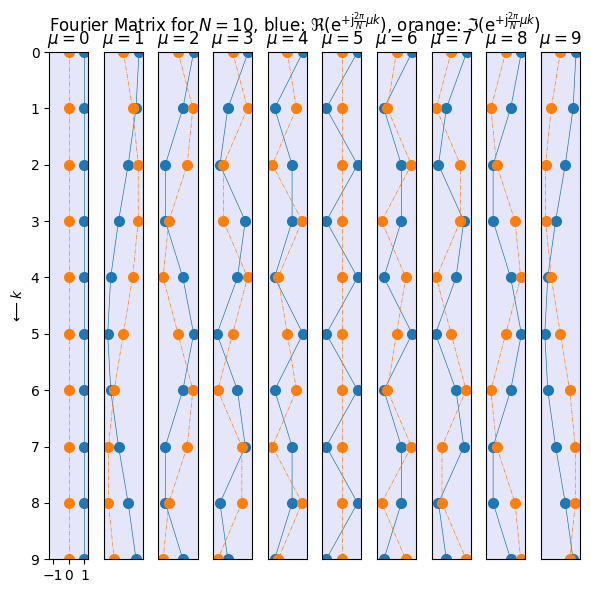

In [10]:
fig, ax = plt.subplots(1, N)
fig.set_size_inches(6, 6)
fig.suptitle(
    r'Fourier Matrix for $N=$%d, blue: $\Re(\mathrm{e}^{+\mathrm{j} \frac{2\pi}{N} \mu k})$, orange: $\Im(\mathrm{e}^{+\mathrm{j} \frac{2\pi}{N} \mu k})$' % N)

for tmp in range(N):
    ax[tmp].set_facecolor('lavender')
    ax[tmp].plot(W[:, tmp].real, k, 'C0o-', ms=7, lw=0.5)
    ax[tmp].plot(W[:, tmp].imag, k, 'C1o-.', ms=7, lw=0.5)
    ax[tmp].set_ylim(N-1, 0)
    ax[tmp].set_xlim(-5/4, +5/4)
    if tmp == 0:
        ax[tmp].set_yticks(np.arange(0, N))
        ax[tmp].set_xticks(np.arange(-1, 1+1, 1))
        ax[tmp].set_ylabel(r'$\longleftarrow k$')
    else:
        ax[tmp].set_yticks([], minor=False)
        ax[tmp].set_xticks([], minor=False)
    ax[tmp].set_title(r'$\mu=$%d' % tmp)
fig.tight_layout()
fig.subplots_adjust(top=0.91)

fig.savefig('fourier_matrix.png', dpi=300)

# TBD: row version for analysis

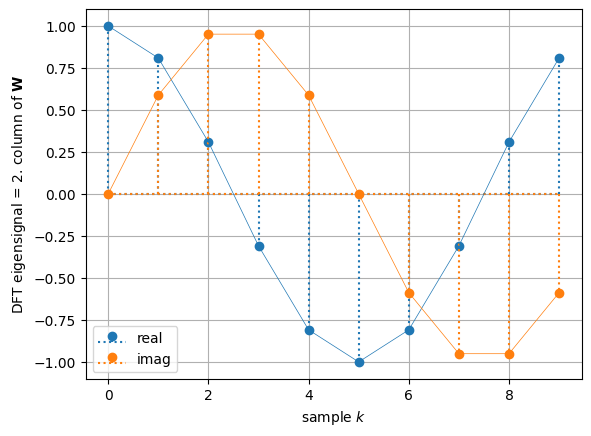

In [11]:
tmpmu = 1  # column index

plt.stem(k, np.real(W[:, tmpmu]), label='real',
         markerfmt='C0o', basefmt='C0:', linefmt='C0:')
plt.stem(k, np.imag(W[:, tmpmu]), label='imag',
         markerfmt='C1o', basefmt='C1:', linefmt='C1:')
# note that connecting the samples by lines is actually wrong, we
# use it anyway for more visual convenience
plt.plot(k, np.real(W[:, tmpmu]), 'C0-', lw=0.5)
plt.plot(k, np.imag(W[:, tmpmu]), 'C1-', lw=0.5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'DFT eigensignal = '+str(tmpmu+1)+'. column of $\mathbf{W}$')
plt.legend()
plt.grid(True)

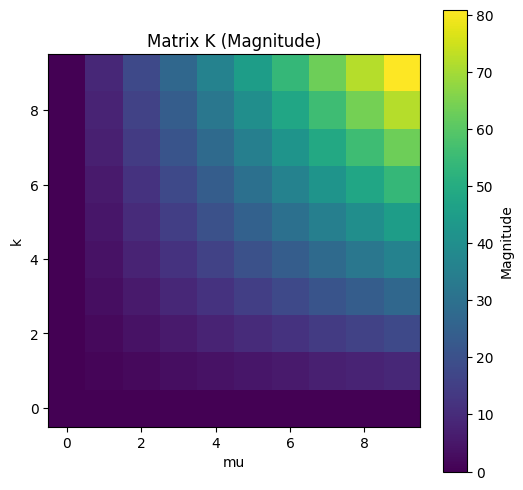

In [13]:
# Visualize the K matrix
plt.figure(figsize=(6, 6))  # Set the figure size
plt.imshow(np.abs(K), cmap='viridis', origin='lower', interpolation='none')
plt.colorbar(label='Magnitude')
plt.title('Matrix K (Magnitude)')
plt.xlabel('mu')
plt.ylabel('k')
plt.show()

In [18]:
X = fft(x_test)
# print(np.allclose(np.conj(W)@x, X))  # >=Python 3.5
print(np.allclose(np.matmul(np.conj(W), x_test), X))

True


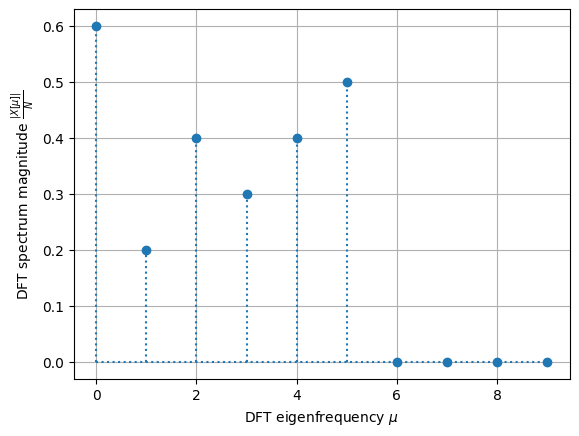

In [19]:
plt.stem(mu, np.abs(X)/N, markerfmt='C0o', basefmt='C0:', linefmt='C0:')
# plt.plot(mu, np.abs(X)/N, 'C0', lw=1)  # this is here a misleading plot and hence not used
plt.xlabel(r'DFT eigenfrequency $\mu$')
plt.ylabel(r'DFT spectrum magnitude $\frac{|X[\mu]|}{N}$')
plt.grid(True)